# SENTIMENTAL ANALYSIS ON ELON MUSK TWEETS


### Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import re
import string
%matplotlib inline

### Importing the dataset

In [2]:

book = open("Elon_musk.csv", "r")
  
# joining with space content of text
book = ' '.join([i for i in book])  
  
# replacing ',' by space
book = book.replace(",", " ")  
book = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', book)
  
#displaying result
print(book)


 Text
 1 @kunalb11 I’m an alien
 2 @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
 3 @joerogan @Spotify Great interview!
 4 @gtera27 Doge is underestimated
 5 @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 6 Happy New Year of the Ox! 
 7 "Frodo was the underdoge 
 All thought he would fail 
 Himself most of all. 
 8 @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
 9 @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
 10 The most entertaining outcome is the most likely
 11 @GiveDirectly Just sent some
 12 Just agree to do Clubhouse with @kanyewest
 13 
 14 @geoffkeighley @UnrealEngine It’s getting real
 15 "Bought some Dogecoin for lil X  so he can be a toddler hodler"
 16 "@JoshManMode He definitely has issues  but the sentencing seems a bit high"
 17 @freewalletorg Thanks for fixing
 18 @freewalletorg Please unlock my account
 19 @AstroJordy <U+0001F923>

In [3]:
text = "".join(book)

In [4]:
text

' Text\n 1 @kunalb11 I’m an alien\n 2 @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?\n 3 @joerogan @Spotify Great interview!\n 4 @gtera27 Doge is underestimated\n 5 @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!\n 6 Happy New Year of the Ox! \n 7 "Frodo was the underdoge \n All thought he would fail \n Himself most of all. \n 8 @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)\n 9 @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.\n 10 The most entertaining outcome is the most likely\n 11 @GiveDirectly Just sent some\n 12 Just agree to do Clubhouse with @kanyewest\n 13 \n 14 @geoffkeighley @UnrealEngine It’s getting real\n 15 "Bought some Dogecoin for lil X  so he can be a toddler hodler"\n 16 "@JoshManMode He definitely has issues  but the sentencing seems a bit high"\n 17 @freewalletorg Thanks for fixing\n 18 @freewalletorg Please unlock my account\n 19 @A

In [5]:
text = re.sub("[^A-Za-z" "]+"," ",text).lower()
text =re.sub("[0-9" "]+"," ",text)

In [6]:
text_words = text.split(" ")

In [7]:
text_words

['',
 'text',
 'kunalb',
 'i',
 'm',
 'an',
 'alien',
 'id',
 'aa',
 'carmack',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'next',
 'level',
 'have',
 'you',
 'tried',
 'it',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera',
 'doge',
 'is',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 'frodo',
 'was',
 'the',
 'underdoge',
 'all',
 'thought',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 'owensparks',
 'flcnhvy',
 'anonyx',
 'haha',
 'thanks',
 'flcnhvy',
 'anonyx',
 'indeed',
 'tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real',
 'world',
 'time',
 'allocation',
 'the',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'givedirectly',
 'just',
 'sent',
 'some',
 'just',
 'agree',
 'to',
 'do',
 'clubhouse',
 'with

In [8]:
textw=" ".join(text_words)

In [9]:
textw

' text kunalb i m an alien id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge all thought he would fail himself most of all owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent real world time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine it s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u f u f this is true power haha freewalletorg any crypto wallet that won t give you your private keys should be avoided at all costs 

# TOKENIZATION

In [13]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(textw)
print(text_tokens[0:50])

['text', 'kunalb', 'i', 'm', 'an', 'alien', 'id', 'aa', 'carmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next', 'level', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
len(text_tokens)

21620

# Remove stopwords

In [15]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['text', 'kunalb', 'alien', 'id', 'aa', 'carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next', 'level', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'owensparks']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Normalize the data


In [16]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['text', 'kunalb', 'alien', 'id', 'aa', 'carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next', 'level', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing']


# Stemming

In [17]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['text', 'kunalb', 'alien', 'id', 'aa', 'carmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'next', 'level', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'thought', 'would', 'fail', 'owenspark']


In [22]:
len(stemmed_tokens)

14724

# Loading the nlp spacy library

In [18]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

# Lemmatization

In [19]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

text kunalb alien id aa carmack ray tracing cyberpunk hdr next level tried joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail


In [20]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['text', 'kunalb', 'alien', '-PRON-', 'd', 'aa', 'carmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'next', 'level', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china']


In [21]:
len(lemmas)

14757

# Feature extraction

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [24]:
print(vectorizer.vocabulary_)

{'text': 3529, 'kunalb': 1895, 'alien': 106, 'pron': 2715, 'aa': 0, 'carmack': 535, 'ray': 2792, 'trace': 3641, 'cyberpunk': 825, 'hdr': 1532, 'next': 2330, 'level': 1953, 'try': 3674, 'joerogan': 1811, 'spotify': 3268, 'great': 1473, 'interview': 1746, 'gtera': 1489, 'doge': 980, 'underestimate': 3725, 'teslacn': 3494, 'congratulation': 721, 'tesla': 3490, 'china': 604, 'amazing': 129, 'execution': 1190, 'last': 1915, 'year': 3976, 'even': 1162, 'happy': 1514, 'new': 2327, 'ox': 2483, 'frodo': 1360, 'underdoge': 3724, 'thought': 3569, 'would': 3951, 'fail': 1226, 'owenspark': 2478, 'flcnhvy': 1303, 'anonyx': 157, 'haha': 1501, 'thank': 3532, 'indeed': 1682, 'tweet': 3690, 'definitely': 883, 'represent': 2871, 'real': 2805, 'world': 3946, 'time': 3586, 'allocation': 109, 'entertain': 1115, 'outcome': 2459, 'likely': 1973, 'givedirectly': 1442, 'send': 3060, 'agree': 80, 'clubhouse': 646, 'kanyewest': 1849, 'geoffkeighley': 1422, 'unrealengine': 3753, 'get': 1427, 'buy': 498, 'dogecoin'

In [25]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['add', 'addict', 'additive', 'address', 'adlanbogatyryov', 'administer', 'adolfo', 'adri', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'af', 'afb', 'affair', 'affect', 'affordable', 'afloathickory', 'africa', 'afshari', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'aholstein', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ajtourville', 'ak', 'aka', 'akidesir', 'akinfermo', 'alandail', 'alarm', 'alert', 'alesssj', 'alex']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(X.toarray().shape)

(14757, 4009)


## Let's see how can bigrams and trigrams can be included here

In [33]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(text_tokens)

In [34]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['aa', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'carmack', 'cleantechnica', 'crew', 'do', 'dragon', 'engineers', 'erdayastronaut', 'feed', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'id', 'if', 'in', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'maybe', 'model', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'should', 'sn', 'so', 'some', 'space', 'spacex', 'starship', 'station', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TFIDF Vectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(text_tokens)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['aa', 'about', 'absolutely', 'accurate', 'actually', 'adamklotz', 'after', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'austinbarnard', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'bass', 'battery', 'be', 'because', 'been', 'before', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'bickett', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'by', 'can', 'car', 'cargo', 'carmack', 'cars', 'caspar', 'cleantechnica', 'close', 'co', 'cold', 'com', 'come', 'coming', 'commercial', 'companies', 'completed', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'course', 'cov', 'crew', 'cyberpunkgame', 'data', 'day', 'days', 'definitely', 'delayslater', 'design', 'did', 'didn', 'different', 'djsnm', 'dmc', 'do', 'does', 'doesn', 'doge', 'doin

# Generate wordcloud

In [38]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

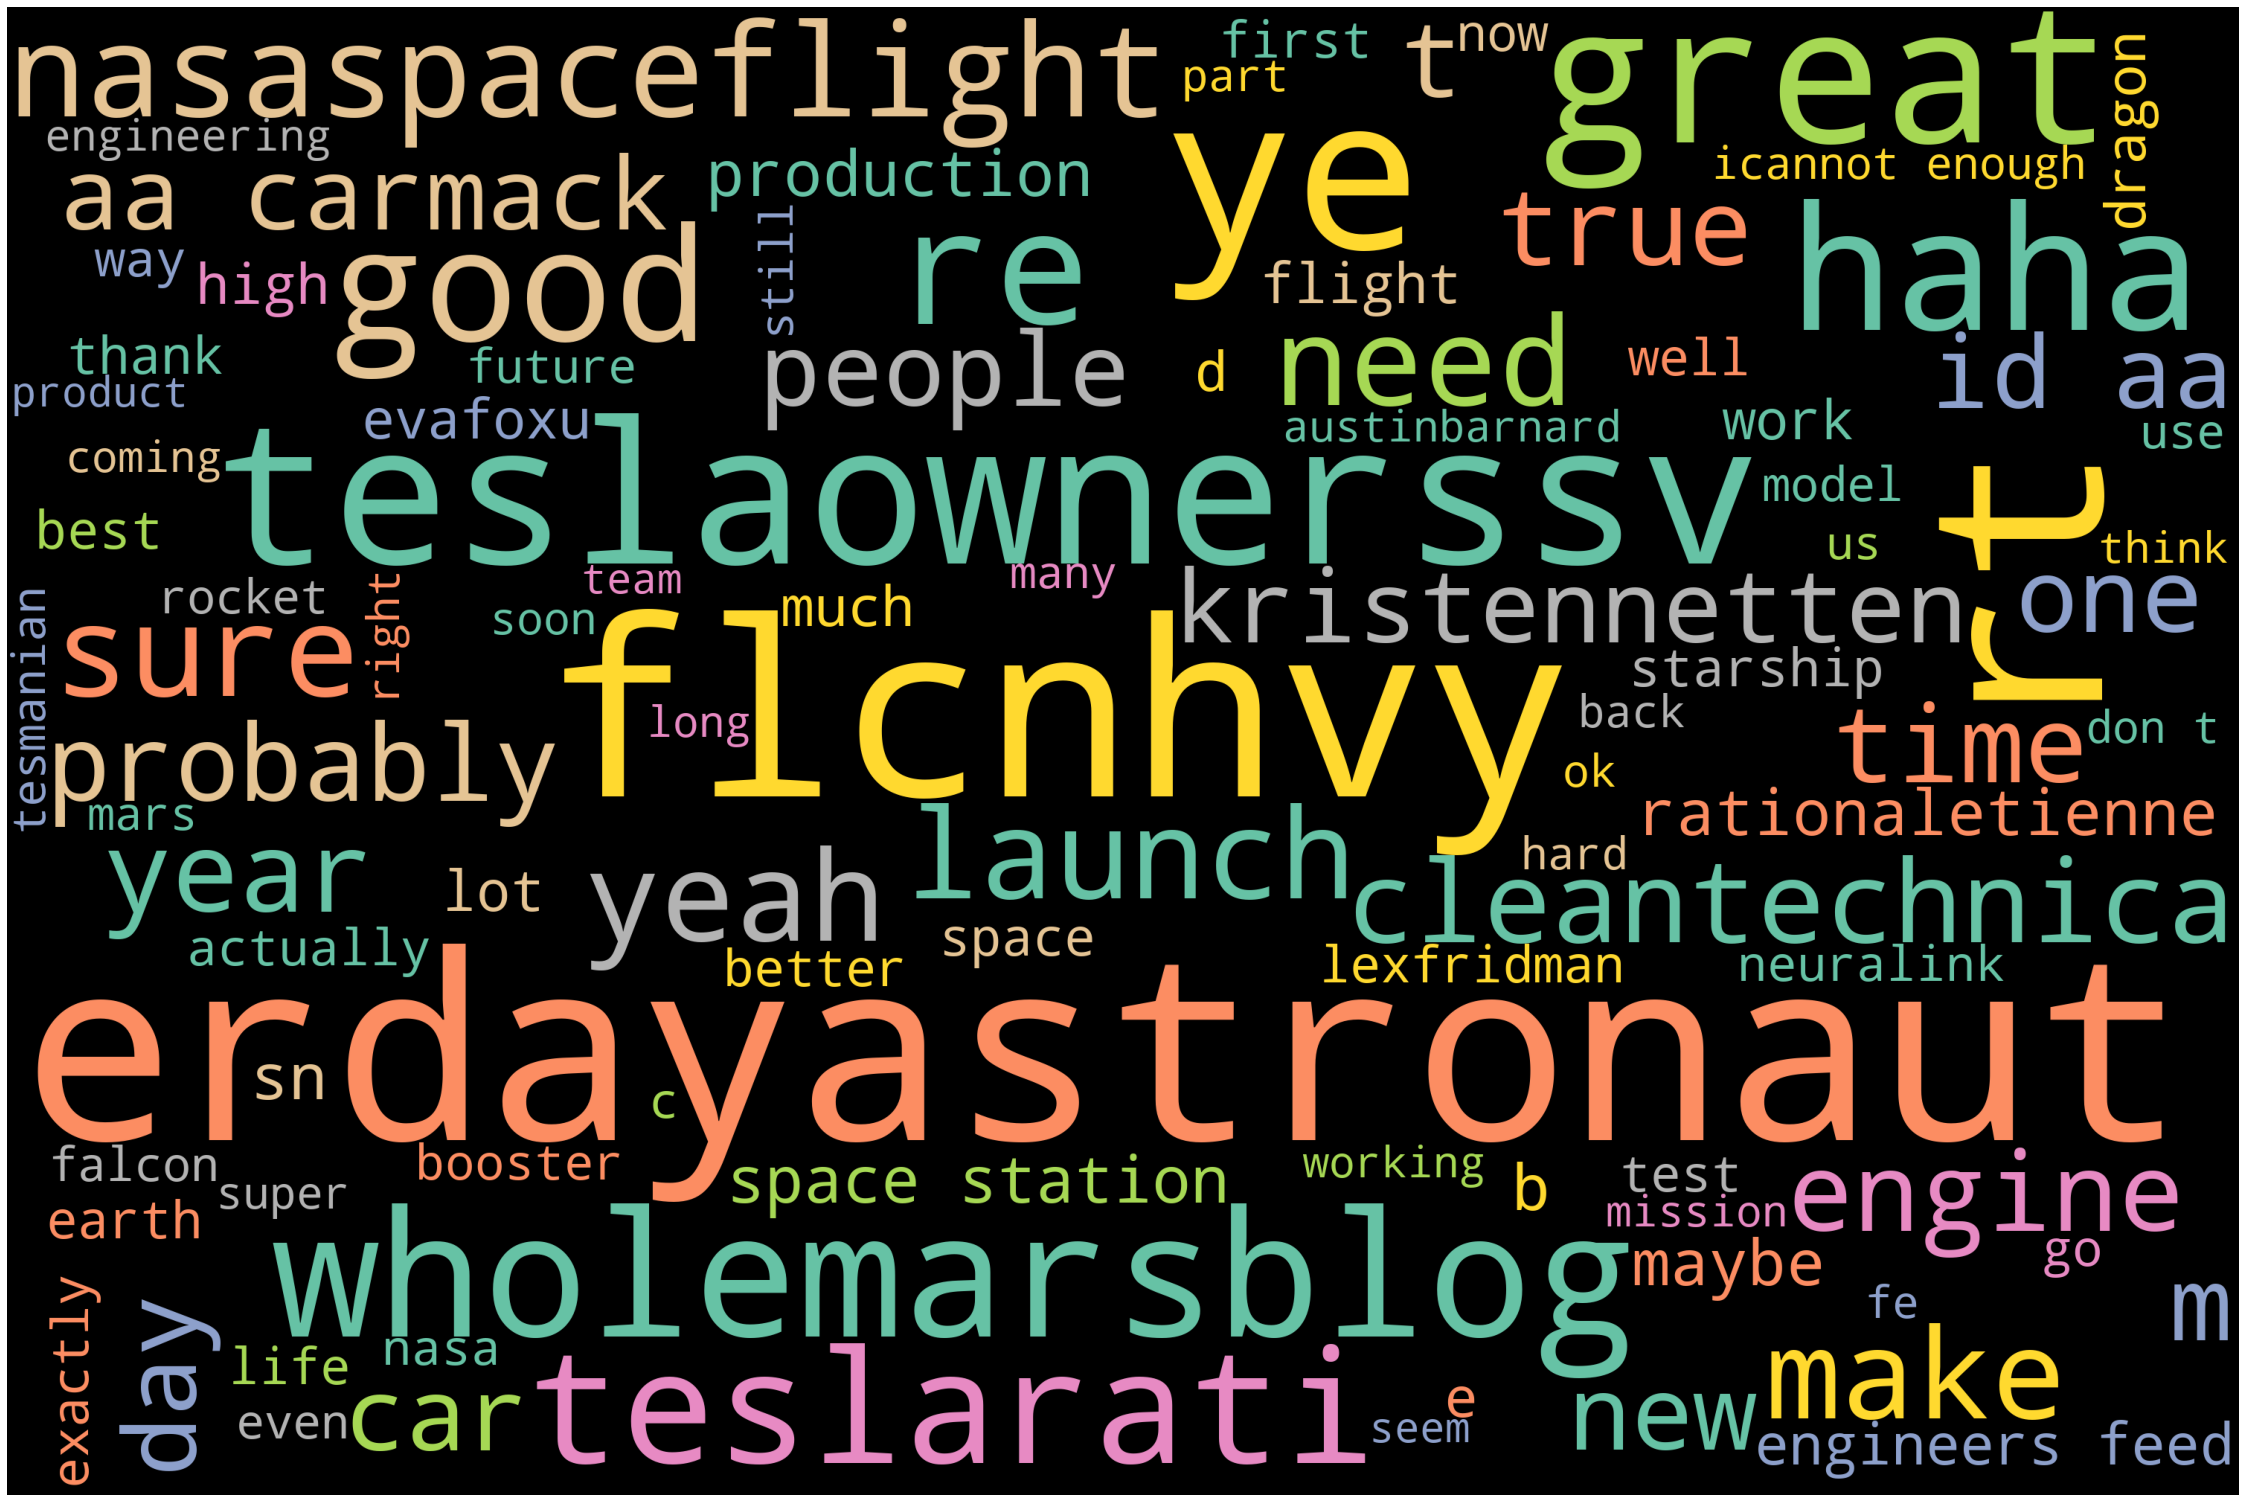

In [42]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('tesla')
stopwords.add('u')
stopwords.add('f')
stopwords.add('amp')
stopwords.add('ppathole')
stopwords.add('s')
stopwords.add('spacex')
stopwords.add('s')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Named Entity Recognition

In [47]:
##Part Of Speech Tagging
nlp = spacy.load('en')

one_block = textw
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [49]:
for token in doc_block[0:20]:
    print(token, token.pos_)

  SPACE
text NOUN
kunalb PROPN
i PROPN
m PROPN
an DET
alien NOUN
i PRON
d VERB
aa PROPN
carmack VERB
ray PROPN
tracing VERB
on ADP
cyberpunk NOUN
with ADP
hdr PROPN
is AUX
next ADJ
level NOUN


In [50]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['cyberpunk', 'level', 'tried', 'spotify', 'interview', 'underestimated', 'congratulations', 'execution', 'year', 'year', 'thought', 'would', 'fail', 'owensparks', 'flcnhvy', 'thanks', 'flcnhvy', 'tweets', 'represent', 'world']


In [51]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,will,165
1,amp,163
2,ppathole,75
3,can,58
4,teslaownerssv,51
5,spacex,51
6,should,49
7,re,47
8,would,41
9,wholemarsblog,41


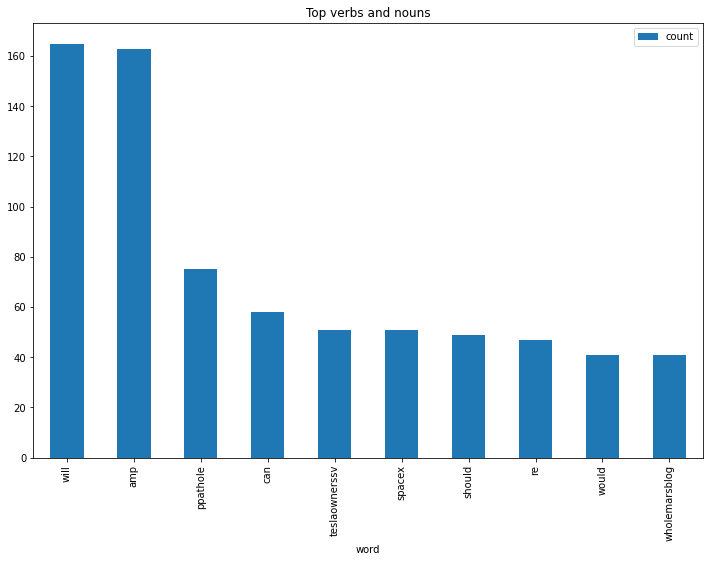

In [52]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

# Emotion Mining

In [54]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [55]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [61]:
book1=pd.read_csv("Elon_musk.csv", sep=',', encoding='latin-1')
book1.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [66]:
from nltk import tokenize
sentences = tokenize.sent_tokenize("".join(book))
sentences[5:15]

['6 Happy New Year of the Ox!',
 '7 "Frodo was the underdoge \n All thought he would fail \n Himself most of all.',
 '8 @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)\n 9 @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 '10 The most entertaining outcome is the most likely\n 11 @GiveDirectly Just sent some\n 12 Just agree to do Clubhouse with @kanyewest\n 13 \n 14 @geoffkeighley @UnrealEngine It’s getting real\n 15 "Bought some Dogecoin for lil X  so he can be a toddler hodler"\n 16 "@JoshManMode He definitely has issues  but the sentencing seems a bit high"\n 17 @freewalletorg Thanks for fixing\n 18 @freewalletorg Please unlock my account\n 19 @AstroJordy <U+0001F923><U+0001F923>\n 20 This is true power haha \n 21 @freewalletorg Any crypto wallet that won’t give you your private keys should be avoided at all costs\n 22 @freewalletorg Your app sucks\n 23 RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements of the lun

In [67]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Text\n 1 @kunalb11 I’m an alien\n 2 @ID_AA_Ca...
1,Have you tried it?
2,3 @joerogan @Spotify Great interview!
3,4 @gtera27 Doge is underestimated\n 5 @teslacn...
4,Now on to the next for even more!!
...,...
908,"1991 ""@kenyanwalstreet Not actually a payout ..."
909,It may never pay out as the stock can’t b… \n...
910,"Details Aug 28."""
911,1993 AI symbiosis while u wait\n 1994 @vistacr...


In [68]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [69]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [70]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [71]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [72]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     16
1      4
2      5
3     15
4      8
5      7
6     14
7     11
8      8
9    121
Name: word_count, dtype: int64

In [73]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
807,"Might be able to… \n 1756 ""@PrisonPlanet Wheth...",11,80
644,It’s not useful for predicting the future nor...,12,128
42,"128 ""@thejackbeyer @NASASpaceflight Cryoproof ...",12,96
182,Also w… \n 465 @cleantechnica Oh and umm … \n...,12,101
638,"It’s… \n 1385 ""@Teslarati Tesla Germany design...",13,67
80,229 @teslaownersSV This is a good one\n 230 @M...,13,45
578,The “open” areas… \n 1254 @SavedTesla @peterdo...,14,142
36,"82 ""@ajtourville @Erdayastronaut @SpaceX Yes ...",15,249
709,We just haven’t observed the… \n 1536 @univers...,15,79
104,294 @Erdayastronaut @SpaceX Was also thinking ...,16,98


In [74]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    913.000000
mean       1.426068
std        2.744464
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [75]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,Text\n 1 @kunalb11 I’m an alien\n 2 @ID_AA_Ca...,0,16
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,6 Happy New Year of the Ox!,0,7
6,"7 ""Frodo was the underdoge \n All thought he w...",-2,14


In [78]:
sent_df[sent_df['sentiment_value']>=15].head()

,sentence,sentiment_value,word_count
36,"82 ""@ajtourville @Erdayastronaut @SpaceX Yes ...",15,249
104,294 @Erdayastronaut @SpaceX Was also thinking ...,16,98
709,We just haven’t observed the… \n 1536 @univers...,15,79


In [79]:
sent_df['index']=range(0,len(sent_df))

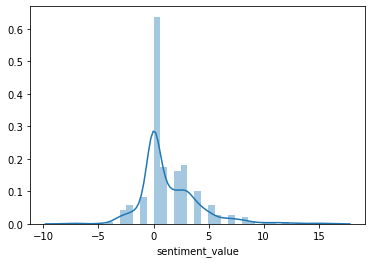

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

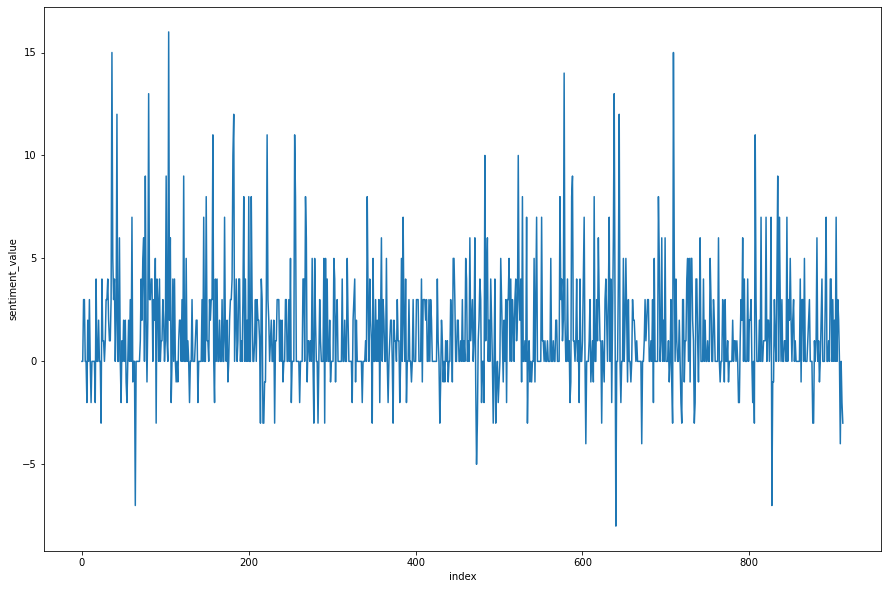

In [81]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

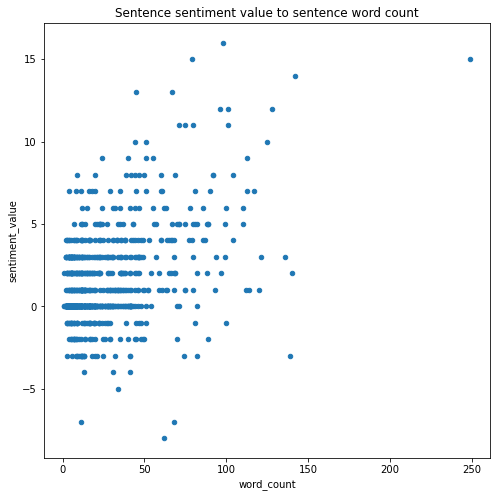

In [82]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# Conclusion:
##                     We performed text mining on Elon Musk dataset,by tokenization,stemming,lemmatization,feature extraction,sentiment analysis and emotion mining.